<a href="https://colab.research.google.com/github/AlexMa123/BIU-Computational-Physics-2022/blob/main/Lecture0%20-%20Introduct%20to%20numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to numpy

## What is Numpy?

NumPy is the `fundamental package` for scientific computing in Python. It is a Python library that provides a `multidimensional array object`, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

### Numpy is Fast

Let's look at an example. Assume we have two arrays: a and b, calculate $a^2 + b^2$

In [ ]:
# pure python code
def pySum(a, b):
    c = []
    for i in range(len(a)):
        c.append(a[i]**2 + b[i] ** 2)
    return c 

# vectorization calculation in numpy
def npSum(a, b):
    c = a ** 2 + b ** 2
    return c

In [ ]:
import numpy as np

a = np.arange(0, 10000)
b = np.arange(0, 10000)

In [ ]:
%timeit pySum(a, b)

7.92 ms ± 158 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit npSum(a, b)

31.6 µs ± 976 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Since 1$\mu s$ is 1000 ms, so the "vectorized" computation is much faster than a python's for loop

> Note, a ** 2 in python is equivalent to a .^ 2 in matlab

> Unlike matlab, you don't need to add a . before an operation to make that operation vectorization, the operations between two arrays are vectorized in numpy by default.

In [ ]:
a + b # equivalent to a .+ b in matlab
a * b # equivalent to a .* b in matlab
a @ b # equivalent to a * b, if a and b are matrices

-1724114088

## Create an ndarray (n dimensional array) object
1. from a list or tuple

In [ ]:
# 1d array
arr1_list = np.array([1, 2, 3, 4])
print(arr1_list)
arr1_tuple = np.array((1, 2, 3, 4))
print(arr1_tuple)

# 2d array
arr2 = np.array([[1, 2, 4], [3, 4, 5]]) # equivalent to [1, 2, 4; 3, 4, 5] in matlab
print(arr2)

[1 2 3 4]
[1 2 3 4]
[[1 2 4]
 [3 4 5]]


2. from numpy functions 

In [ ]:
arr1 = np.zeros((2, 2)) # create an array of all zeros, shape is (2, 2)
print(arr1)

arr2 = np.ones((2, 2)) # Create an array of all ones
print(arr2)

arr3 = np.full((2, 2), 10) # create a constant array
print(arr3)

d = np.eye(3) # identity matrix
print(d)

r = np.random.rand(3, 3) # Create an array filled with random values uniformly disrtibuted from 0 to 1
print(r)

arr4 = np.arange(0, 10, 1) # equivalent to arr4 = 0:1:9 in matlab
print(arr4)

[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]
[[10 10]
 [10 10]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0.92240432 0.45849809 0.35391916]
 [0.39460597 0.22696778 0.30481057]
 [0.7935529  0.71373049 0.64868327]]
[0 1 2 3 4 5 6 7 8 9]


## Array indexing

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8])
# the index is from 0 in python
print("second element in a is: ", a[1])
print("the last element:", a[-1])
# slicing a[start:end:step]
print("from the first elemnt to the thrid element", a[:3])
print(a[1:5])
print("select data every 2 elements", a[::2])


second element in a is:  2
the last element: 8
from the first elemnt to the thrid element [1 2 3]
[2 3 4 5]
select data every 2 elements [1 3 5 7]


In [ ]:
# boolean indexing
print(a < 5)
print(a[[True, True, True, True, False, False, False, False]])
# equivalent to
print(a[a < 5])

[ True  True  True  True False False False False]
[1 2 3 4]
[1 2 3 4]


estimate $\pi$ using boolean indexing:

Generate N random points (x, y) between 0 to 1.
count how many points obey: $x^2 + y ^ 2 < 1$, assume there are M points inside the circle
$\pi \approx 4 M/N$

In [ ]:
n = 100000
x, y = np.random.rand(2, n)
4 * x[x **2 + y **2 < 1].size / n

3.14004

In [ ]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

print(a)

print("the shape of a is: ", a.shape)
print(a[0, 0]) 

print("get the the first row: ", a[0])
print("get the first column: ", a[:, 0])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
the shape of a is:  (3, 4)
1
get the the first row:  [1 2 3 4]
get the first column:  [1 5 9]


## Array Math

In [ ]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])

x + y

array([[ 6,  8],
       [10, 12]])

In [ ]:
x - y

array([[-4, -4],
       [-4, -4]])

In [ ]:
x * y

array([[ 5, 12],
       [21, 32]])

In [ ]:
x @ y # matrix product

array([[19, 22],
       [43, 50]])

In [ ]:
np.sqrt(x)

array([[1.        , 1.41421356],
       [1.73205081, 2.        ]])

In [ ]:
x.T # transpose

array([[1, 3],
       [2, 4]])

In [ ]:
np.sum(x) # sum of all elements

10

In [ ]:
np.sum(x, axis=0)  # compute the sum of each column

array([4, 6])

In [ ]:
np.sum(x, axis=1) # compute the sum of each row

array([3, 7])

In [ ]:
np.linalg.inv(x) # inverse of matrix x

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

## Matplotlib

Matplotlib is a plotting library which provides a plotting system similar to MATLAB.

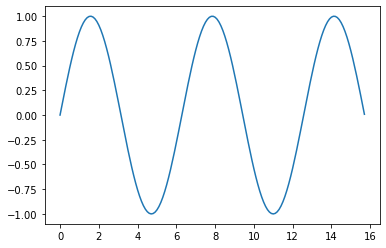

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5 * np.pi, 0.1) # 0:0.1:5*pi
y = np.sin(x)

plt.plot(x, y)
plt.show()

with more curves

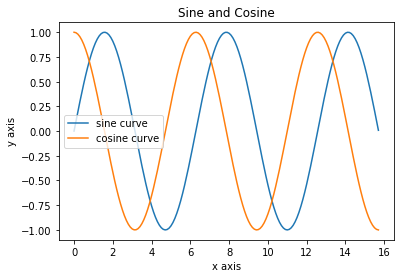

In [ ]:
x = np.arange(0, 5 * np.pi, 0.1) # 0:0.1:5*pi
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, label="sine curve")
plt.plot(x, y2, label="cosine curve")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Sine and Cosine")
plt.legend() # show legend
plt.show()

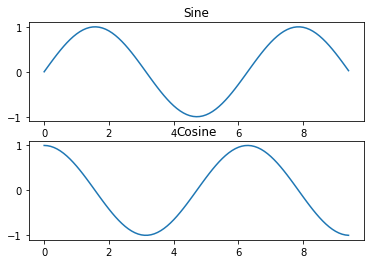

In [ ]:
# subplots

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()
